In [1]:
import pandas as pd
import numpy as npb
from numpy import NaN
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('lol_2020_2022.csv')
df['blue_side_win'] = df['score'].apply(lambda x: int(x[0]))
df['red_side_win'] = df['score'].apply(lambda x: int(x[-1]))

In [3]:
#ORIGEN was rebranded as astralis on 2020, thus we changed it to avoid confusion
df.loc[df['team_1_blue_side'] == 'OG',"team_1_blue_side"]= 'AST'
df.loc[df['team_2_red_side'] == 'OG',"team_2_red_side"]= 'AST'

In [4]:
df.head(10)

,season,week,patch,team_1_blue_side,team_2_red_side,score,blue_side_win,red_side_win
0,LEC 2020 Spring Season,Week 1,10.1,G2,MAD,1 - 0,1,0
1,LEC 2020 Spring Season,Week 1,10.1,VIT,SK,0 - 1,0,1
2,LEC 2020 Spring Season,Week 1,10.1,MSF,RGE,0 - 1,0,1
3,LEC 2020 Spring Season,Week 1,10.1,S04,XL,0 - 1,0,1
4,LEC 2020 Spring Season,Week 1,10.1,FNC,AST,0 - 1,0,1
5,LEC 2020 Spring Season,Week 1,10.1,VIT,MAD,0 - 1,0,1
6,LEC 2020 Spring Season,Week 1,10.1,RGE,XL,1 - 0,1,0
7,LEC 2020 Spring Season,Week 1,10.1,S04,AST,0 - 1,0,1
8,LEC 2020 Spring Season,Week 1,10.1,MSF,FNC,0 - 1,0,1
9,LEC 2020 Spring Season,Week 1,10.1,G2,SK,1 - 0,1,0


In [5]:
winrate = {}
for team in df['team_1_blue_side'].unique():
    winrate[team +"winrate%"] = round(((df[df['team_1_blue_side'] == team]['blue_side_win'].sum() + 
    df[df['team_2_red_side'] == team]['red_side_win'].sum())/df[(df['team_1_blue_side'] == 'G2') | (df['team_2_red_side'] == 'G2' )]['blue_side_win'].shape[0])*100,1)
    

In [6]:
df[(df['team_1_blue_side'] == 'G2') | (df['team_2_red_side'] == 'G2' )]['blue_side_win'].shape[0]

108

In [7]:
dfwins = df.copy()


In [8]:
for team in df['team_1_blue_side'].unique():
    dfwins[f'{team}win'] = dfwins.apply(lambda x: int(x[5][0]) if x[3]==team else (int(x[5][-1]) if x[4]==team else NaN),axis=1)
    dfwins[f'{team}win'].replace(0,-1,inplace=True)
    dfwins[f'{team}win'].replace(NaN,0,inplace=True)
    


In [9]:

dfwins = dfwins.drop(["team_1_blue_side","team_2_red_side","blue_side_win","red_side_win","score"], axis="columns")
dfwins = dfwins.groupby(["season","week","patch"]).sum()
for team in df['team_1_blue_side'].unique():
    dfwins[f'{team}win'] = dfwins[f'{team}win'].cumsum()
dfwins = dfwins.reset_index()

In [10]:
dfwins["season_week"] = dfwins["season"]+dfwins["week"]
dfwins.head()


,season,week,patch,G2win,VITwin,MSFwin,S04win,FNCwin,RGEwin,MADwin,XLwin,ASTwin,SKwin,BDSwin,season_week
0,LEC 2020 Spring Season,Week 1,10.1,2.0,-2.0,-2.0,-2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,LEC 2020 Spring SeasonWeek 1
1,LEC 2020 Spring Season,Week 2,10.2,4.0,-4.0,0.0,-4.0,2.0,2.0,0.0,0.0,2.0,-2.0,0.0,LEC 2020 Spring SeasonWeek 2
2,LEC 2020 Spring Season,Week 3,10.2,6.0,-6.0,2.0,-6.0,2.0,0.0,2.0,0.0,2.0,-2.0,0.0,LEC 2020 Spring SeasonWeek 3
3,LEC 2020 Spring Season,Week 4,10.3,4.0,-8.0,4.0,-6.0,2.0,2.0,2.0,0.0,4.0,-4.0,0.0,LEC 2020 Spring SeasonWeek 4
4,LEC 2020 Spring Season,Week 5,10.3,4.0,-8.0,4.0,-6.0,4.0,2.0,2.0,0.0,4.0,-6.0,0.0,LEC 2020 Spring SeasonWeek 5


<AxesSubplot: xlabel='season_week', ylabel='G2win'>

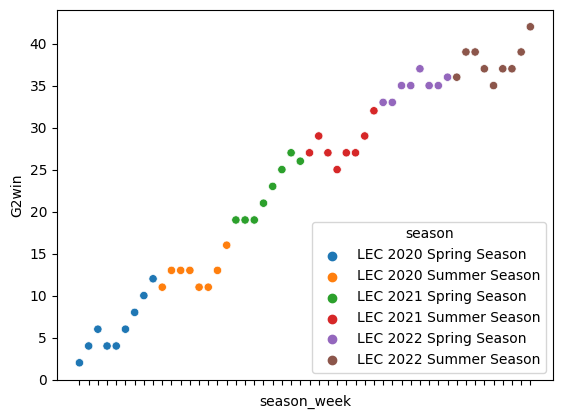

In [11]:
g2graph = sns.scatterplot(data=dfwins,x="season_week",y="G2win", hue="season")
g2graph.set(xticklabels=[])
g2graph

In [67]:
#we review the teams
df['team_1_blue_side'].unique()

array(['G2', 'VIT', 'MSF', 'S04', 'FNC', 'RGE', 'MAD', 'XL', 'AST', 'SK',
       'BDS'], dtype=object)

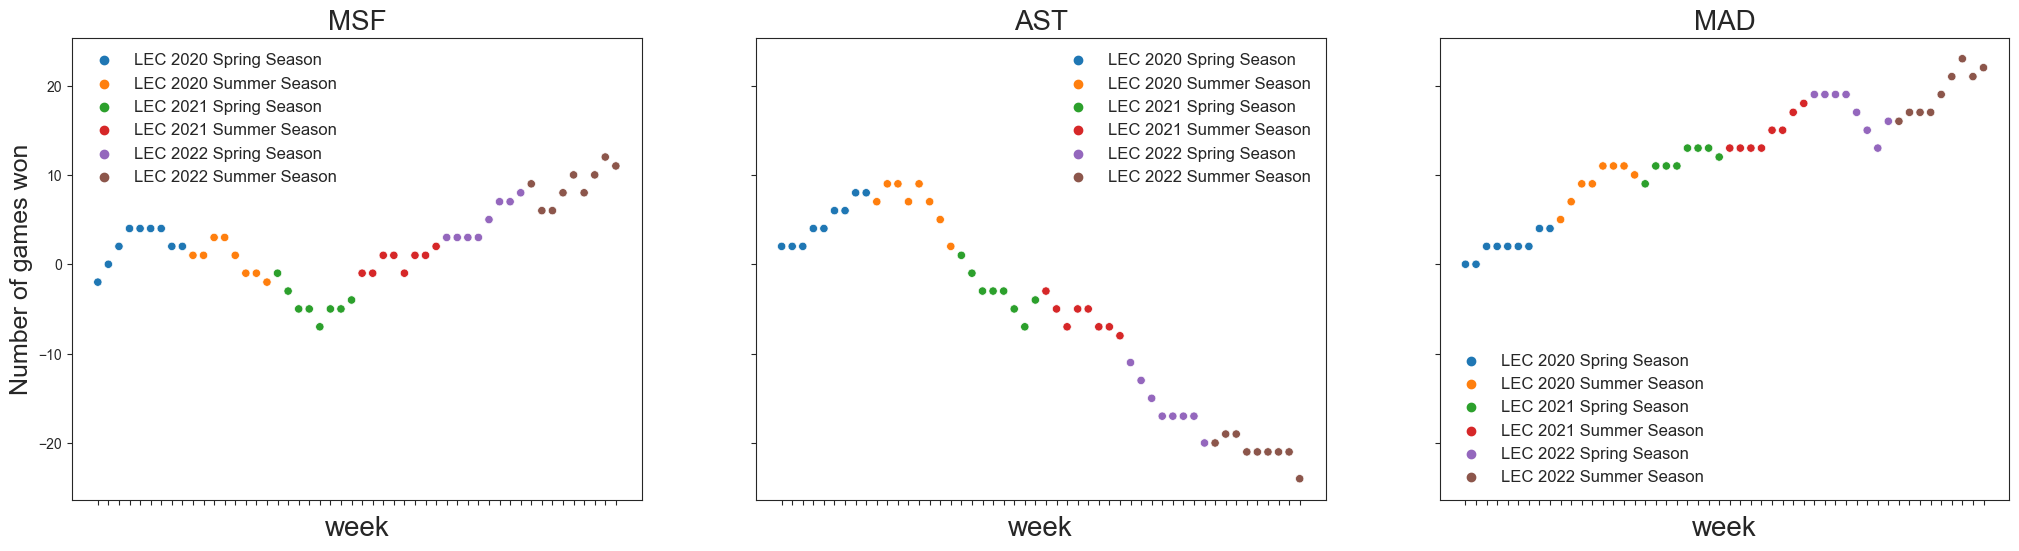

In [120]:
teams = ['MSF','AST','MAD']
def wintred(teams):
    fig, axes = plt.subplots(1,3,
                        figsize=(25,6),
                        sharey=True)
                        
    for i in range(3):
        sns.scatterplot(data=dfwins,x="season_week",
        y=f'{teams[i]}win', hue="season",ax=axes[i] )
        axes[i].set_title(f'{teams[i]}')
    for i in range(3):
        axes[i].set_title(f'{teams[i]}',fontsize=20)
        axes[i].set_xticklabels([])
        axes[i].set_xlabel("week",fontsize=20)
        axes[i].legend(frameon=False,fontsize=12)
    axes[0].set_ylabel("Number of games won",fontsize=18)
wintred(teams)

#we will not take into the graphs team BDS and S04 as on 2021 team BDS bought S04 place in the LEC, but did not mantain most of the previous team SK04, thus this information does not add any value for these charts

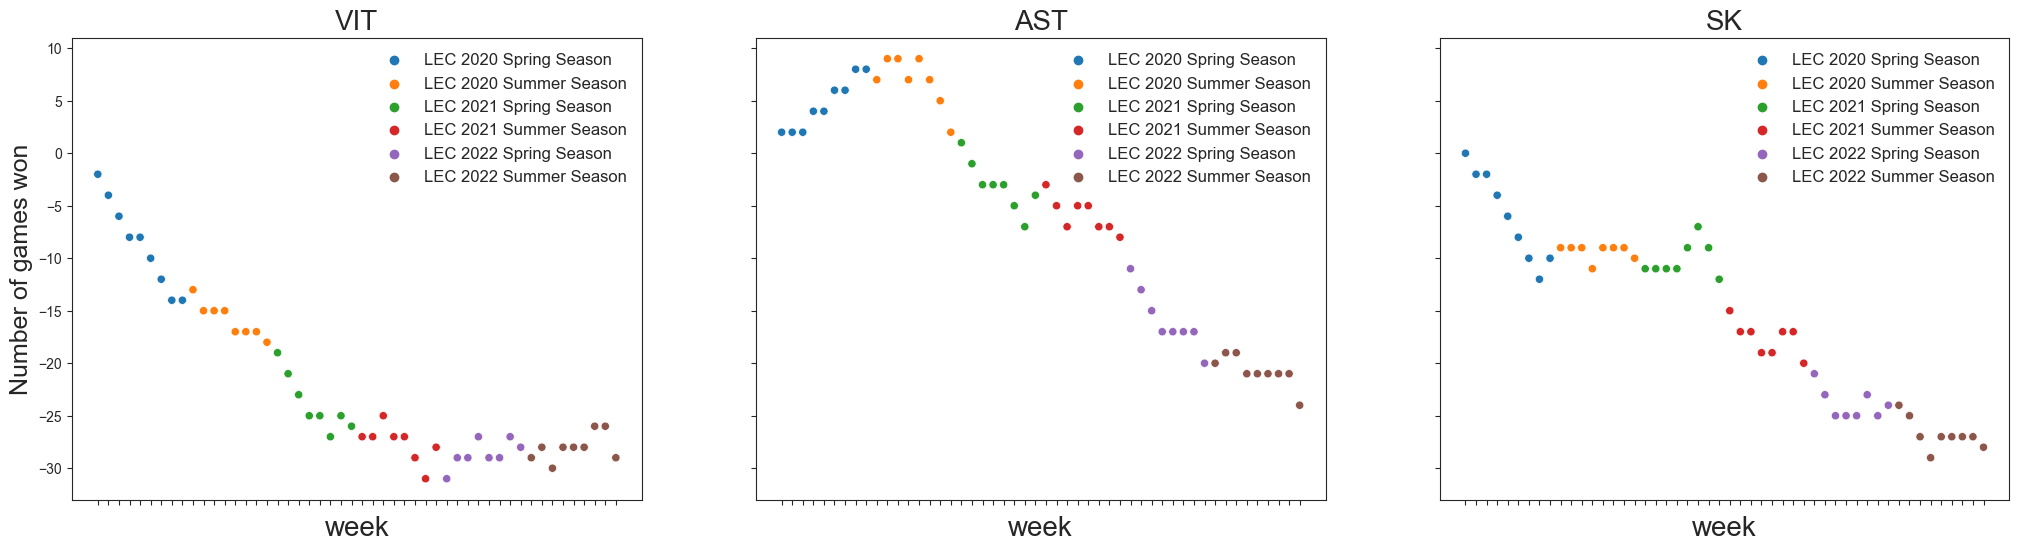

In [121]:
teams = ['VIT','AST','SK']
wintred(teams)

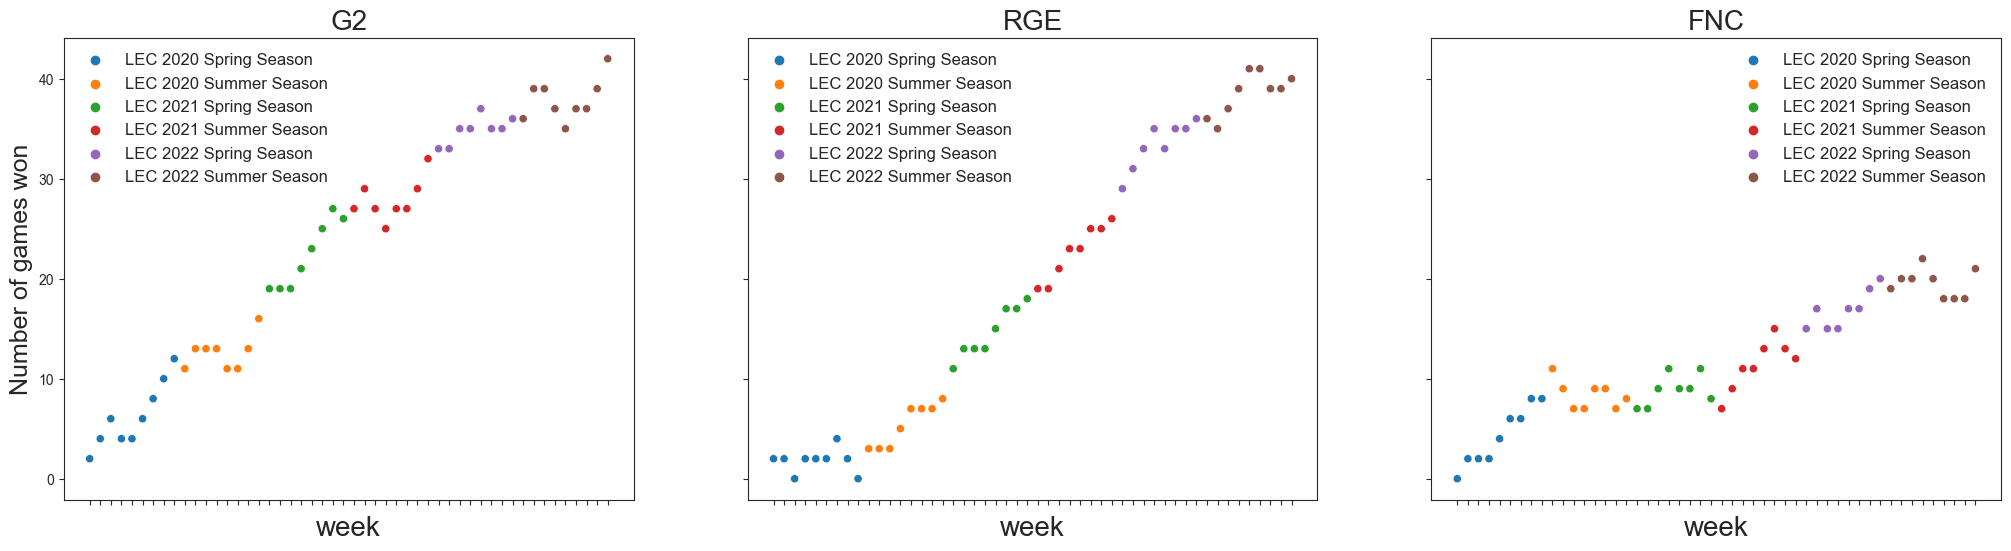

In [122]:
teams = ['G2','RGE','FNC']
wintred(teams)





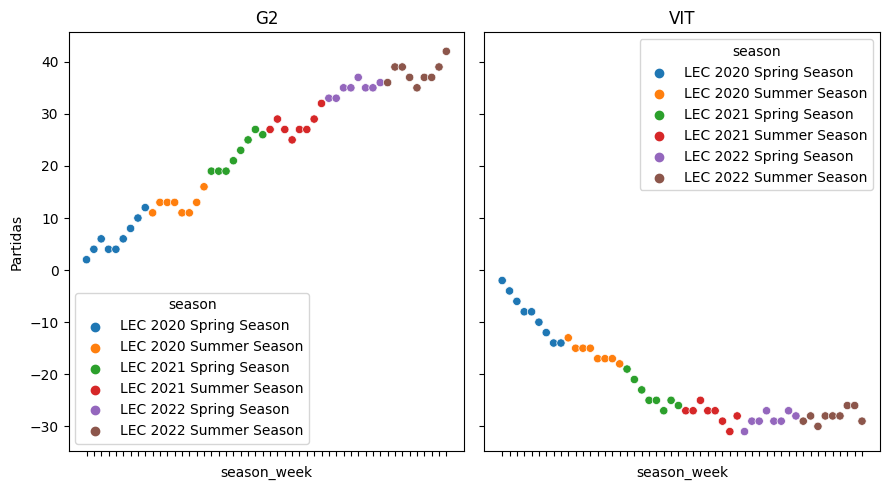

In [23]:
from matplotlib.pyplot import xticks


fig, axes = plt.subplots(1,2,
                      figsize=(9,5),
                      sharey=True)

sns.scatterplot(data=dfwins,x="season_week",
y="G2win", hue="season",ax=axes[0] )
sns.scatterplot(data=dfwins,x="season_week",
y="VITwin", hue="season",ax=axes[1])
axes[0].set_ylabel("Partidas")
axes[0].set_title("G2")
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[1].set_title("VIT")
fig.tight_layout()



In [139]:
winrate

{'G2winrate%': 69.4,
 'VITwinrate%': 37.0,
 'MSFwinrate%': 55.6,
 'S04winrate%': 24.1,
 'FNCwinrate%': 60.2,
 'RGEwinrate%': 68.5,
 'MADwinrate%': 60.2,
 'XLwinrate%': 44.4,
 'ASTwinrate%': 38.9,
 'SKwinrate%': 37.0,
 'BDSwinrate%': 6.5}

In [151]:

winrate = pd.DataFrame(winrate, index=["%winrate"]).transpose().sort_values(by="%winrate",ascending=False)
winrate

,%winrate
G2winrate%,69.4
RGEwinrate%,68.5
FNCwinrate%,60.2
MADwinrate%,60.2
MSFwinrate%,55.6
XLwinrate%,44.4
ASTwinrate%,38.9
VITwinrate%,37.0
SKwinrate%,37.0
S04winrate%,24.1


,season,week,patch,score,G2win,VITwin,MSFwin,S04win,FNCwin,RGEwin,MADwin,XLwin,SKwin,ASTwin,BDSwin
0,LEC 2020 Spring Season,Week 1,10.1,1 - 0,1,0,0,0,0,0,0,0,0,0,0
1,LEC 2020 Spring Season,Week 1,10.1,0 - 1,0,0,0,0,0,0,0,0,1,0,0
2,LEC 2020 Spring Season,Week 1,10.1,0 - 1,0,0,0,0,0,1,0,0,0,0,0
3,LEC 2020 Spring Season,Week 1,10.1,0 - 1,0,0,0,0,0,0,0,1,0,0,0
4,LEC 2020 Spring Season,Week 1,10.1,0 - 1,0,0,0,0,0,0,0,0,0,1,0


In [72]:
#create a column for every team
df['G2win'] = df.apply(lambda x: int(x[5][0]) if x[3]=='G2'else (x[5][-1] if x[4]=='G2' else NaN),axis=1)
df['VITwin'] = df.apply(lambda x: int(x[5][0]) if x[3]=='VIT'else (x[5][-1] if x[4]=='VIT' else NaN),axis=1)
df['MSFwin'] = df.apply(lambda x: int(x[5][0]) if x[3]=='MSF'else (x[5][-1] if x[4]=='MSF' else NaN),axis=1)
df['S04win'] = df.apply(lambda x: int(x[5][0]) if x[3]=='S04'else (x[5][-1] if x[4]=='S04' else NaN),axis=1)
df['FNCwin'] = df.apply(lambda x: int(x[5][0]) if x[3]=='FNC'else (x[5][-1] if x[4]=='FNC' else NaN),axis=1)
df['RGEwin'] = df.apply(lambda x: int(x[5][0]) if x[3]=='RGE'else (x[5][-1] if x[4]=='RGE' else NaN),axis=1)
df['MADwin'] = df.apply(lambda x: int(x[5][0]) if x[3]=='MAD'else (x[5][-1] if x[4]=='MAD' else NaN),axis=1)
df['XLwin'] = df.apply(lambda x: int(x[5][0]) if x[3]=='XL'else (x[5][-1] if x[4]=='XL' else NaN),axis=1)
df['SKwin'] = df.apply(lambda x: int(x[5][0]) if x[3]=='SK'else (x[5][-1] if x[4]=='SK' else NaN),axis=1)
df['ASTwin'] = df.apply(lambda x: int(x[5][0]) if x[3]=='AST'else (x[5][-1] if x[4]=='AST' else NaN),axis=1)
df['BDSwin'] = df.apply(lambda x: int(x[5][0]) if x[3]=='BDS'else (x[5][-1] if x[4]=='BDS' else NaN),axis=1)




In [66]:
df.head(10)

,season,week,patch,team_1_blue_side,team_2_red_side,score,blue_side_win,red_side_win,G2win,VITwin,MSFwin,S04win,FNCwin,RGEwin,MADwin,XLwin,SKwin,ASTwin,BDSwin
0,LEC 2020 Spring Season,Week 1,10.1,G2,MAD,1 - 0,1,0,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,LEC 2020 Spring Season,Week 1,10.1,VIT,SK,0 - 1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
2,LEC 2020 Spring Season,Week 1,10.1,MSF,RGE,0 - 1,0,1,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,LEC 2020 Spring Season,Week 1,10.1,S04,XL,0 - 1,0,1,NaN,NaN,NaN,0,NaN,NaN,NaN,1,NaN,NaN,NaN
4,LEC 2020 Spring Season,Week 1,10.1,FNC,AST,0 - 1,0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN
5,LEC 2020 Spring Season,Week 1,10.1,VIT,MAD,0 - 1,0,1,NaN,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
6,LEC 2020 Spring Season,Week 1,10.1,RGE,XL,1 - 0,1,0,NaN,NaN,NaN,NaN,NaN,1,NaN,0,NaN,NaN,NaN
7,LEC 2020 Spring Season,Week 1,10.1,S04,AST,0 - 1,0,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1,NaN
8,LEC 2020 Spring Season,Week 1,10.1,MSF,FNC,0 - 1,0,1,NaN,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
9,LEC 2020 Spring Season,Week 1,10.1,G2,SK,1 - 0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
